In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

In [104]:
df = pd.read_csv('../data/country_data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [105]:
df.shape

(167, 10)

In [106]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<Axes: xlabel='child_mort', ylabel='Count'>

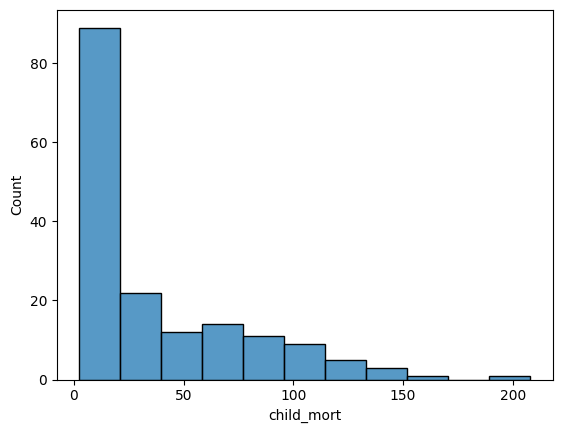

In [107]:
sns.histplot(df['child_mort'])

<Axes: xlabel='income', ylabel='Count'>

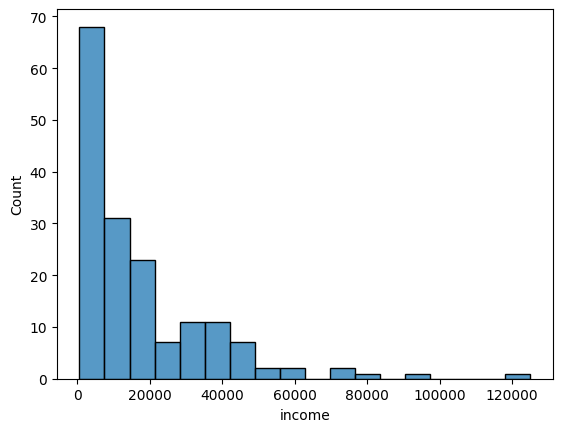

In [108]:
sns.histplot(df['income'])

<Axes: xlabel='gdpp', ylabel='Count'>

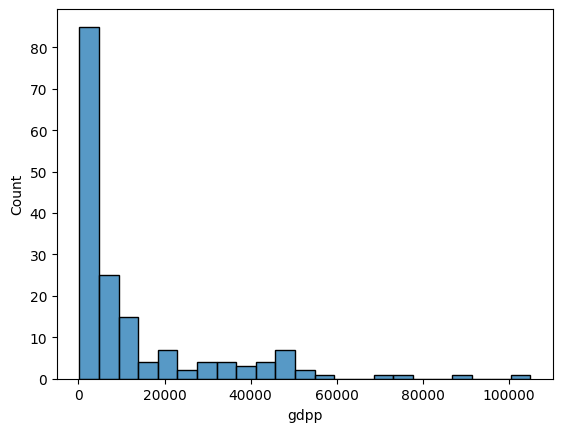

In [109]:
sns.histplot(df['gdpp'])

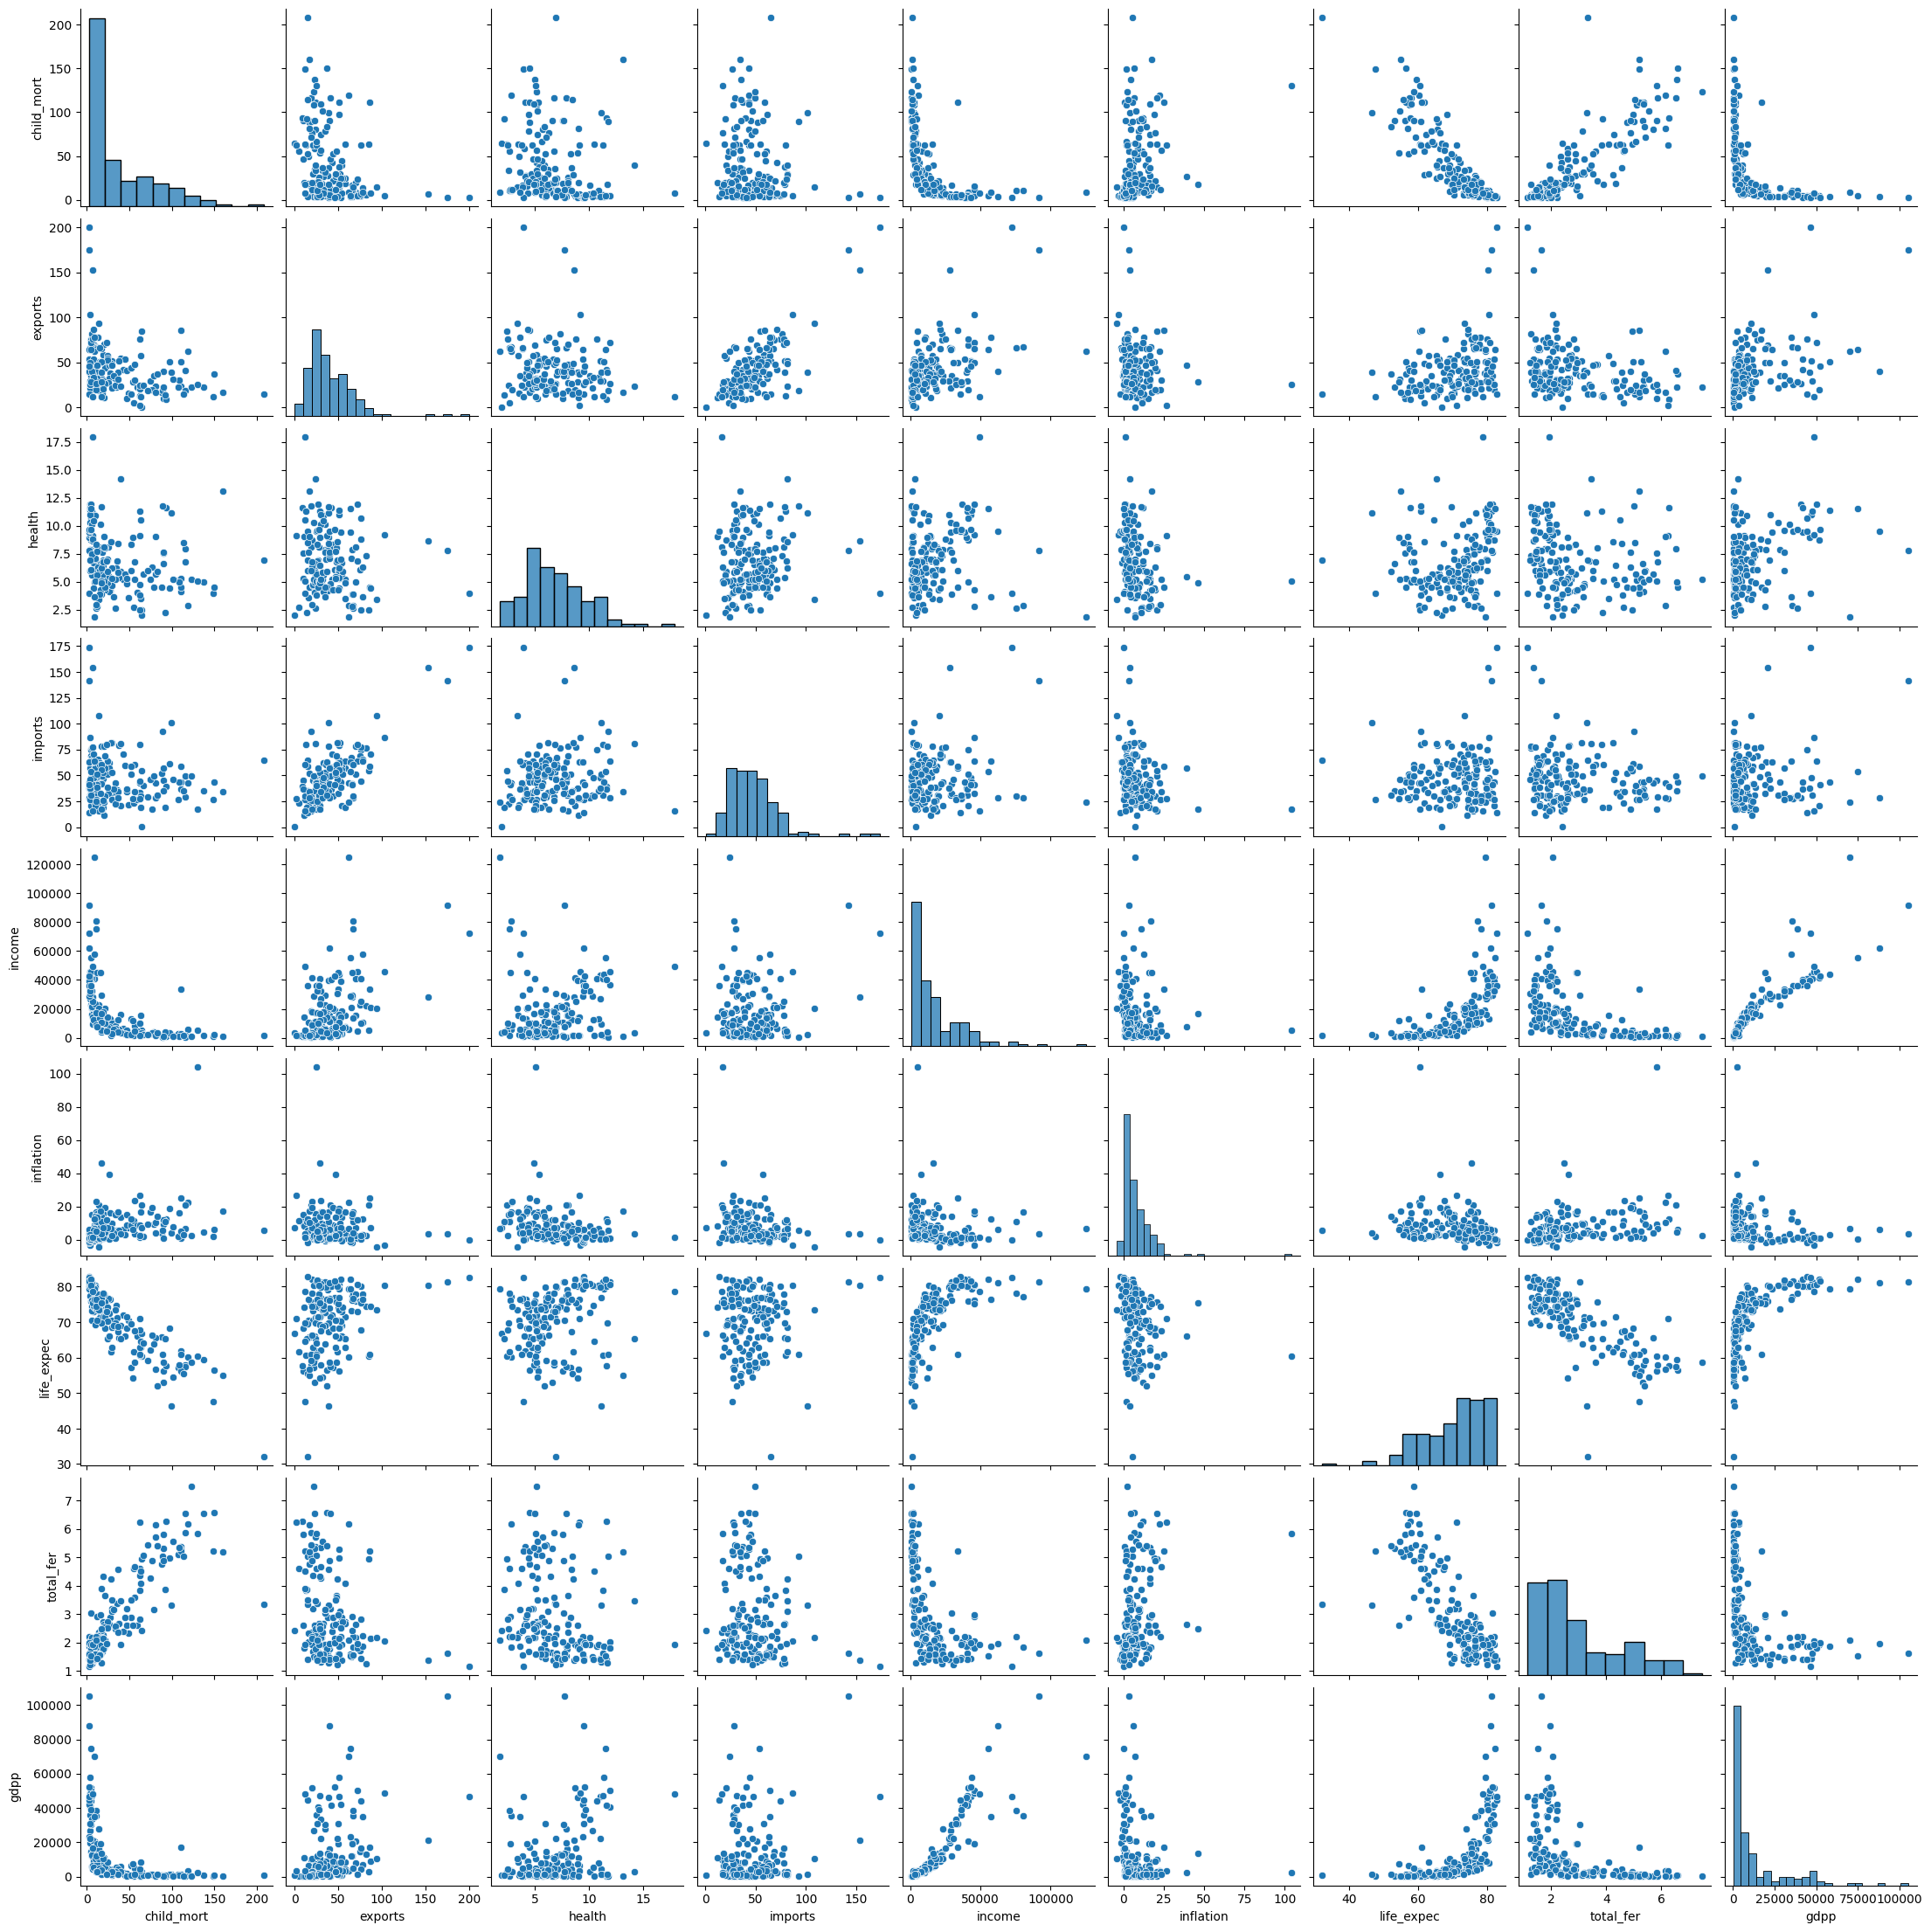

In [110]:
sns.pairplot(df)

In [111]:
df_cluster1 = df.drop('country',axis=1)
df_cluster1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [112]:
scale = StandardScaler()
scale = scale.fit_transform(df_cluster1)
df_scale = pd.DataFrame(scale,columns=df_cluster1.columns)
df_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [113]:
df_scale.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.722904e-17,2.127373e-16,5.504579e-16,2.765585e-16,-7.977650e-17,-1.063687e-17,3.696311e-16,3.044803e-16,5.850277e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [114]:
km = KMeans(n_clusters=4,n_init='auto')
km.fit(df_scale)
km.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

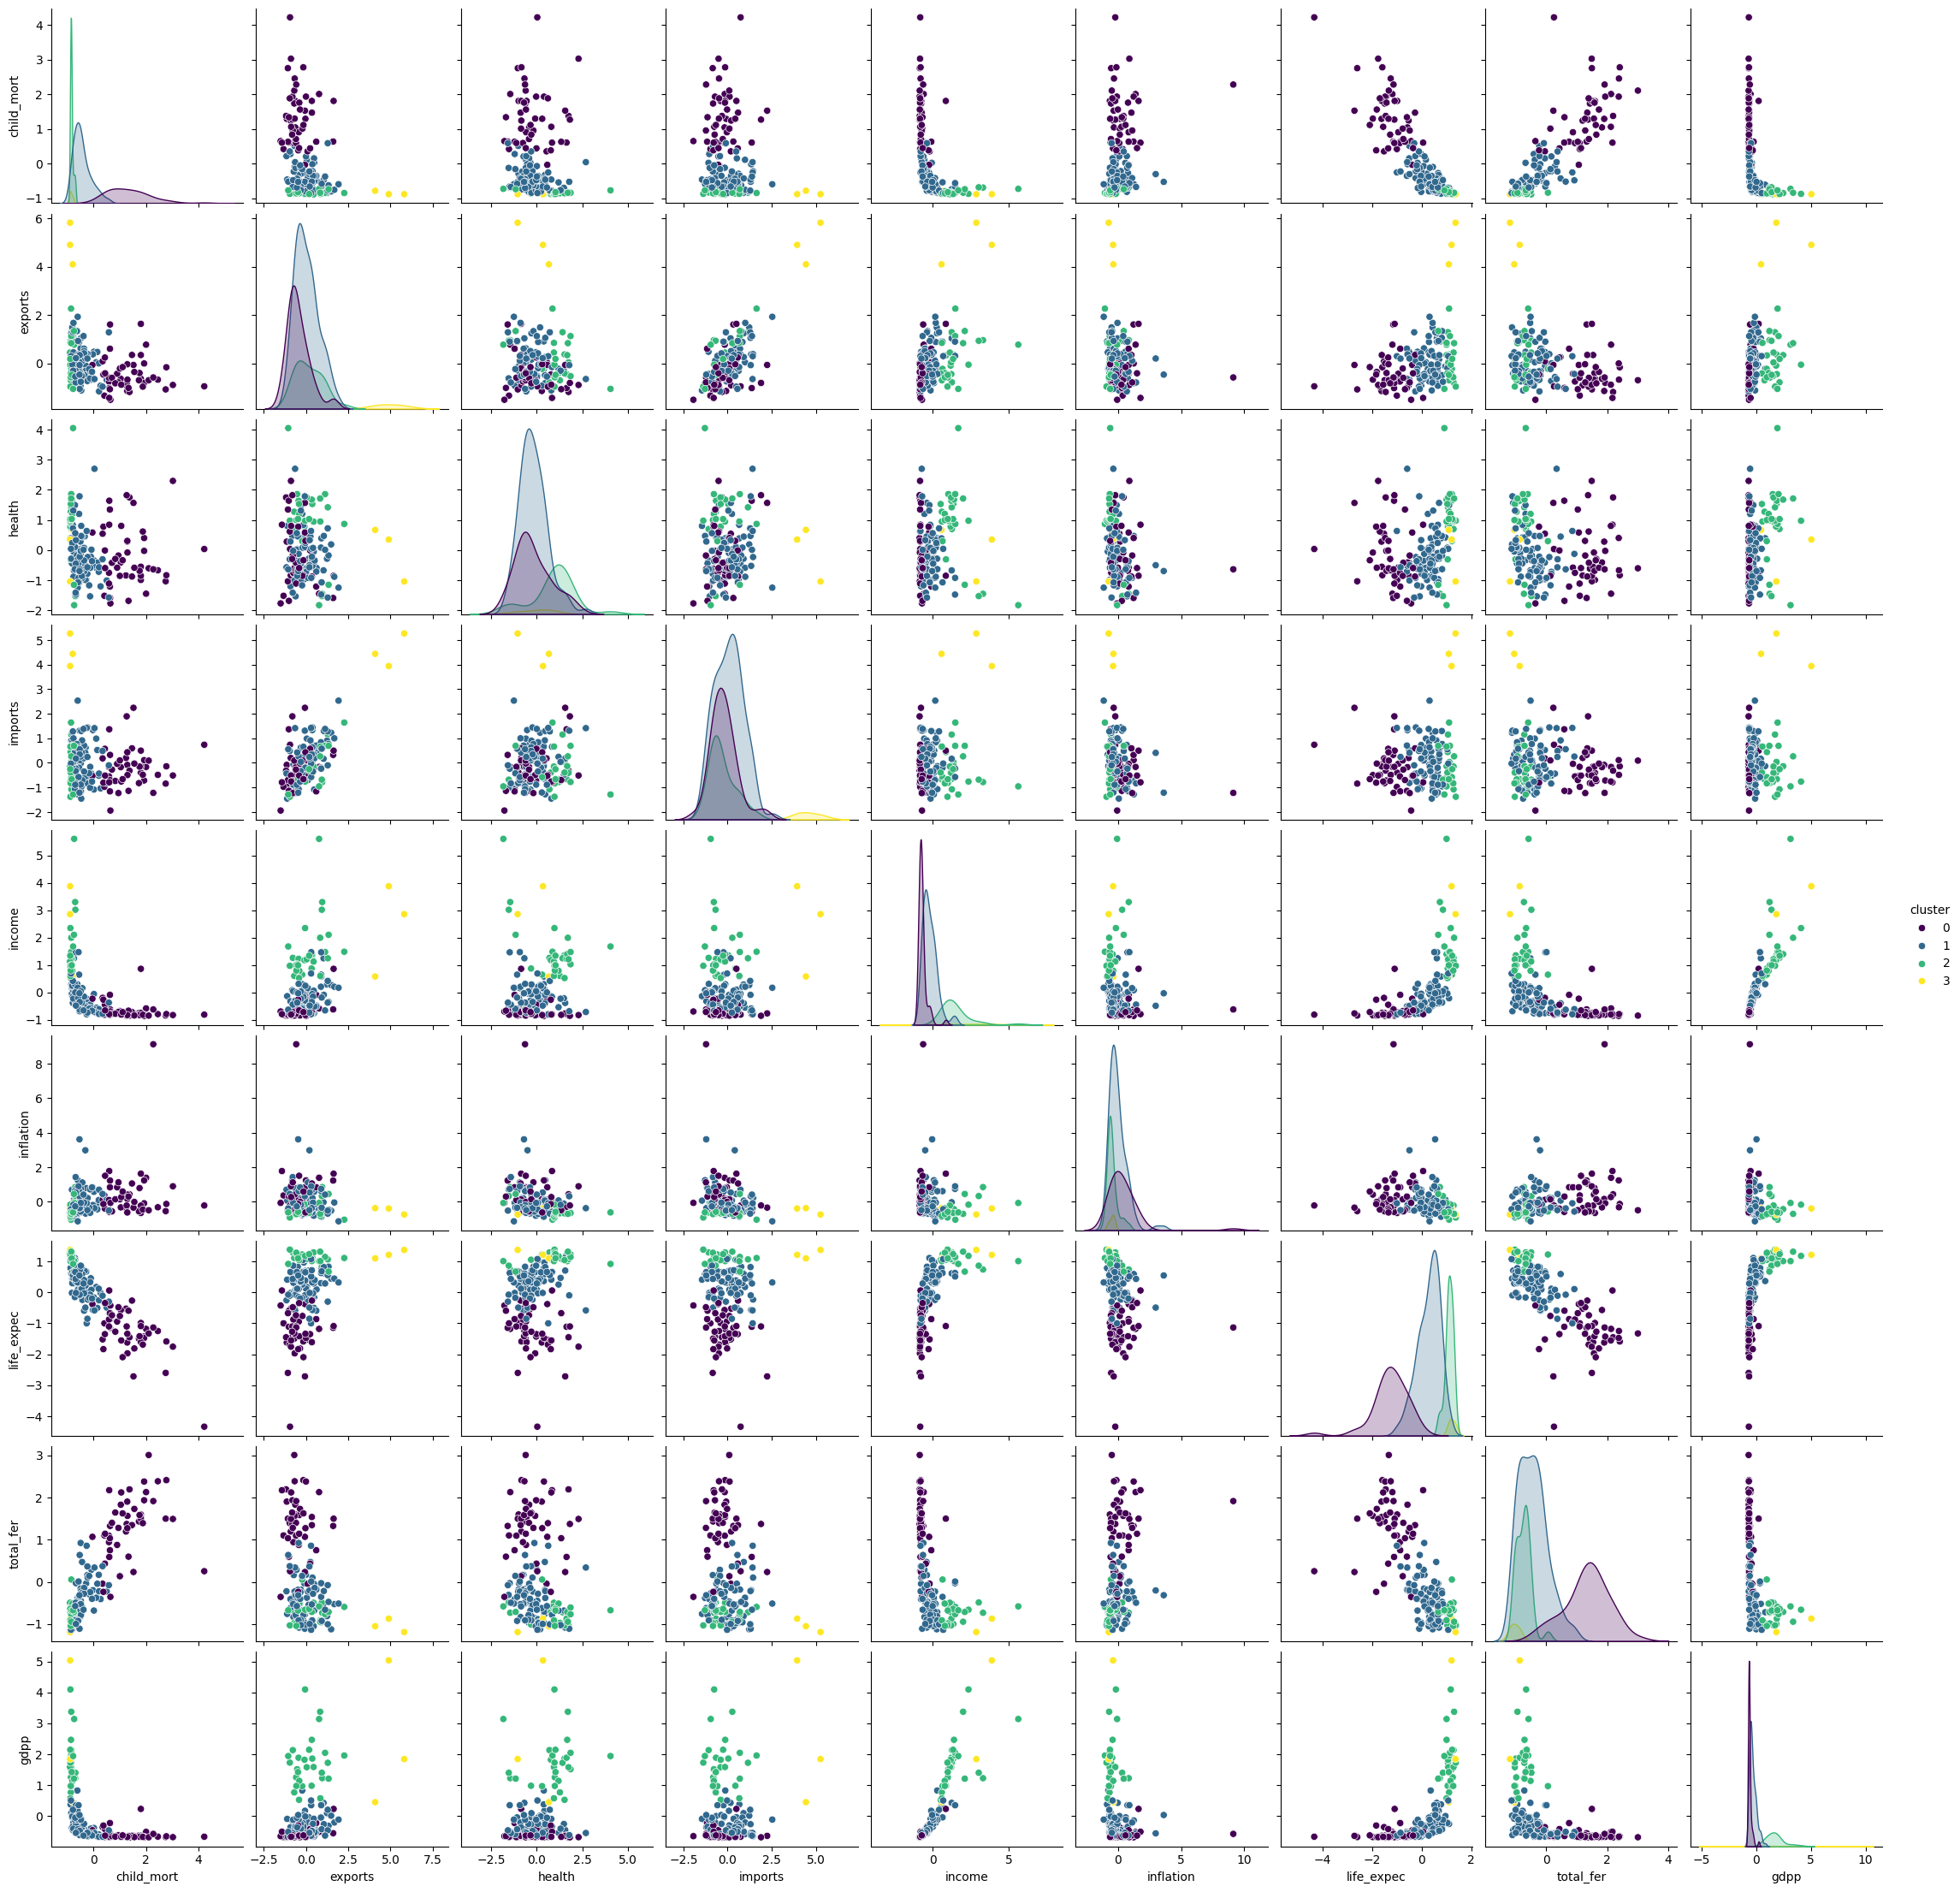

In [115]:
df_scale['cluster'] = km.labels_

sns.pairplot(df_scale,hue='cluster',palette='viridis')

In [116]:
km.inertia_

700.7033258497509

In [117]:
km.cluster_centers_

array([[ 1.34541883, -0.45967186, -0.1895969 , -0.22567743, -0.68713515,
         0.39226703, -1.26429235,  1.32908188, -0.60530769],
       [-0.43706491,  0.02737909, -0.19090588,  0.06955093, -0.20131886,
        -0.03918493,  0.28566125, -0.44720856, -0.31752579],
       [-0.82787747,  0.16811209,  0.88737767, -0.30560645,  1.48891727,
        -0.47955552,  1.1087252 , -0.75076544,  1.70196967],
       [-0.84900324,  4.93567278, -0.00816303,  4.54805768,  2.4395424 ,
        -0.50420614,  1.22682431, -1.03886271,  2.44079735]])

In [118]:
sse = []

k_rang = range(1,10)

for k in k_rang:
    km = KMeans(n_clusters=k,n_init='auto')
    km.fit(df_scale)
    sse.append(km.inertia_)

sse

[1590.9880239520958,
 1386.6883711370951,
 835.6545709005932,
 848.1727625144297,
 649.86960863317,
 604.3344094010693,
 572.7649875033035,
 470.860475443208,
 457.4874838346635]

<Axes: >

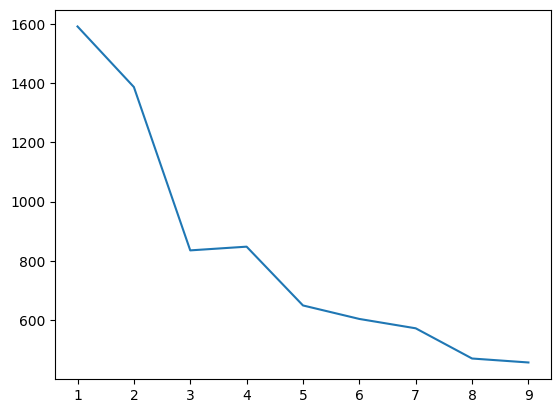

In [119]:
sns.lineplot(x=k_rang,y=sse)

In [120]:
hc = AgglomerativeClustering(n_clusters=6,metric='cosine',linkage='complete')
hc.fit(df_scale)
hc.labels_

array([4, 0, 0, 3, 2, 0, 0, 2, 2, 0, 2, 5, 0, 2, 2, 5, 1, 4, 1, 0, 2, 4,
       0, 5, 2, 4, 4, 0, 4, 2, 0, 4, 4, 2, 0, 0, 4, 4, 3, 2, 4, 2, 2, 2,
       2, 0, 0, 0, 0, 3, 0, 2, 0, 2, 2, 3, 4, 2, 2, 4, 2, 0, 0, 4, 4, 1,
       4, 2, 2, 0, 0, 0, 3, 5, 2, 2, 0, 2, 1, 0, 4, 4, 5, 1, 4, 2, 2, 4,
       4, 5, 2, 5, 2, 4, 4, 1, 1, 4, 1, 3, 2, 1, 1, 3, 2, 0, 4, 0, 4, 0,
       5, 2, 4, 3, 2, 5, 0, 1, 1, 0, 0, 2, 2, 5, 0, 0, 4, 0, 5, 4, 2, 1,
       4, 1, 2, 5, 1, 4, 2, 2, 0, 0, 3, 2, 2, 2, 0, 4, 1, 3, 4, 0, 1, 0,
       0, 4, 2, 5, 2, 2, 0, 0, 0, 3, 1, 3, 4])

In [121]:
df_scale['hc_cluster'] = hc.labels_

df_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hc_cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0,4
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0,3
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1,2


In [126]:

df_scale['country'] = df.country
x = df_scale.drop(columns=['cluster','hc_cluster','country'],axis=1)
x = x.head(50)
z = linkage(x,method='average')
z

array([[ 1.        , 48.        ,  0.55954063,  2.        ],
       [13.        , 41.        ,  0.59915403,  2.        ],
       [ 4.        , 24.        ,  0.74451667,  2.        ],
       [ 8.        , 44.        ,  0.75277946,  2.        ],
       [17.        , 28.        ,  0.79141128,  2.        ],
       [45.        , 46.        ,  0.80463976,  2.        ],
       [22.        , 35.        ,  0.86227289,  2.        ],
       [10.        , 51.        ,  0.91222115,  3.        ],
       [18.        , 30.        ,  0.95170436,  2.        ],
       [19.        , 47.        ,  0.95477211,  2.        ],
       [16.        , 27.        ,  0.99315359,  2.        ],
       [50.        , 55.        ,  1.00227103,  4.        ],
       [ 6.        , 34.        ,  1.02349259,  2.        ],
       [20.        , 39.        ,  1.05881068,  2.        ],
       [ 0.        , 25.        ,  1.05884856,  2.        ],
       [29.        , 53.        ,  1.13050212,  3.        ],
       [52.        , 57.

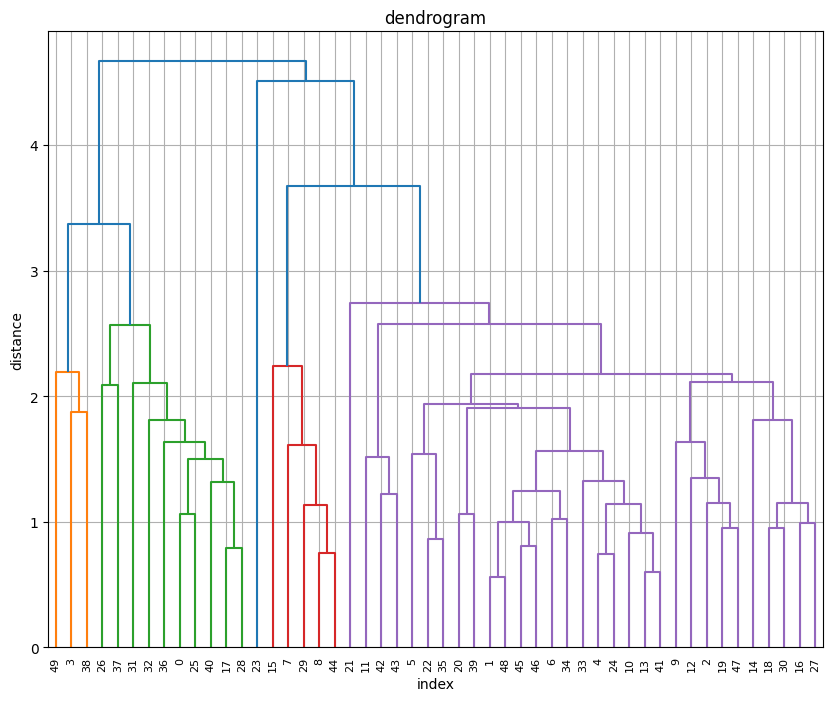

In [127]:
plt.figure(figsize=(10,8))
plt.title('dendrogram')
dendrogram(z)
plt.xlabel('index')
plt.ylabel('distance')
plt.grid()
plt.show()

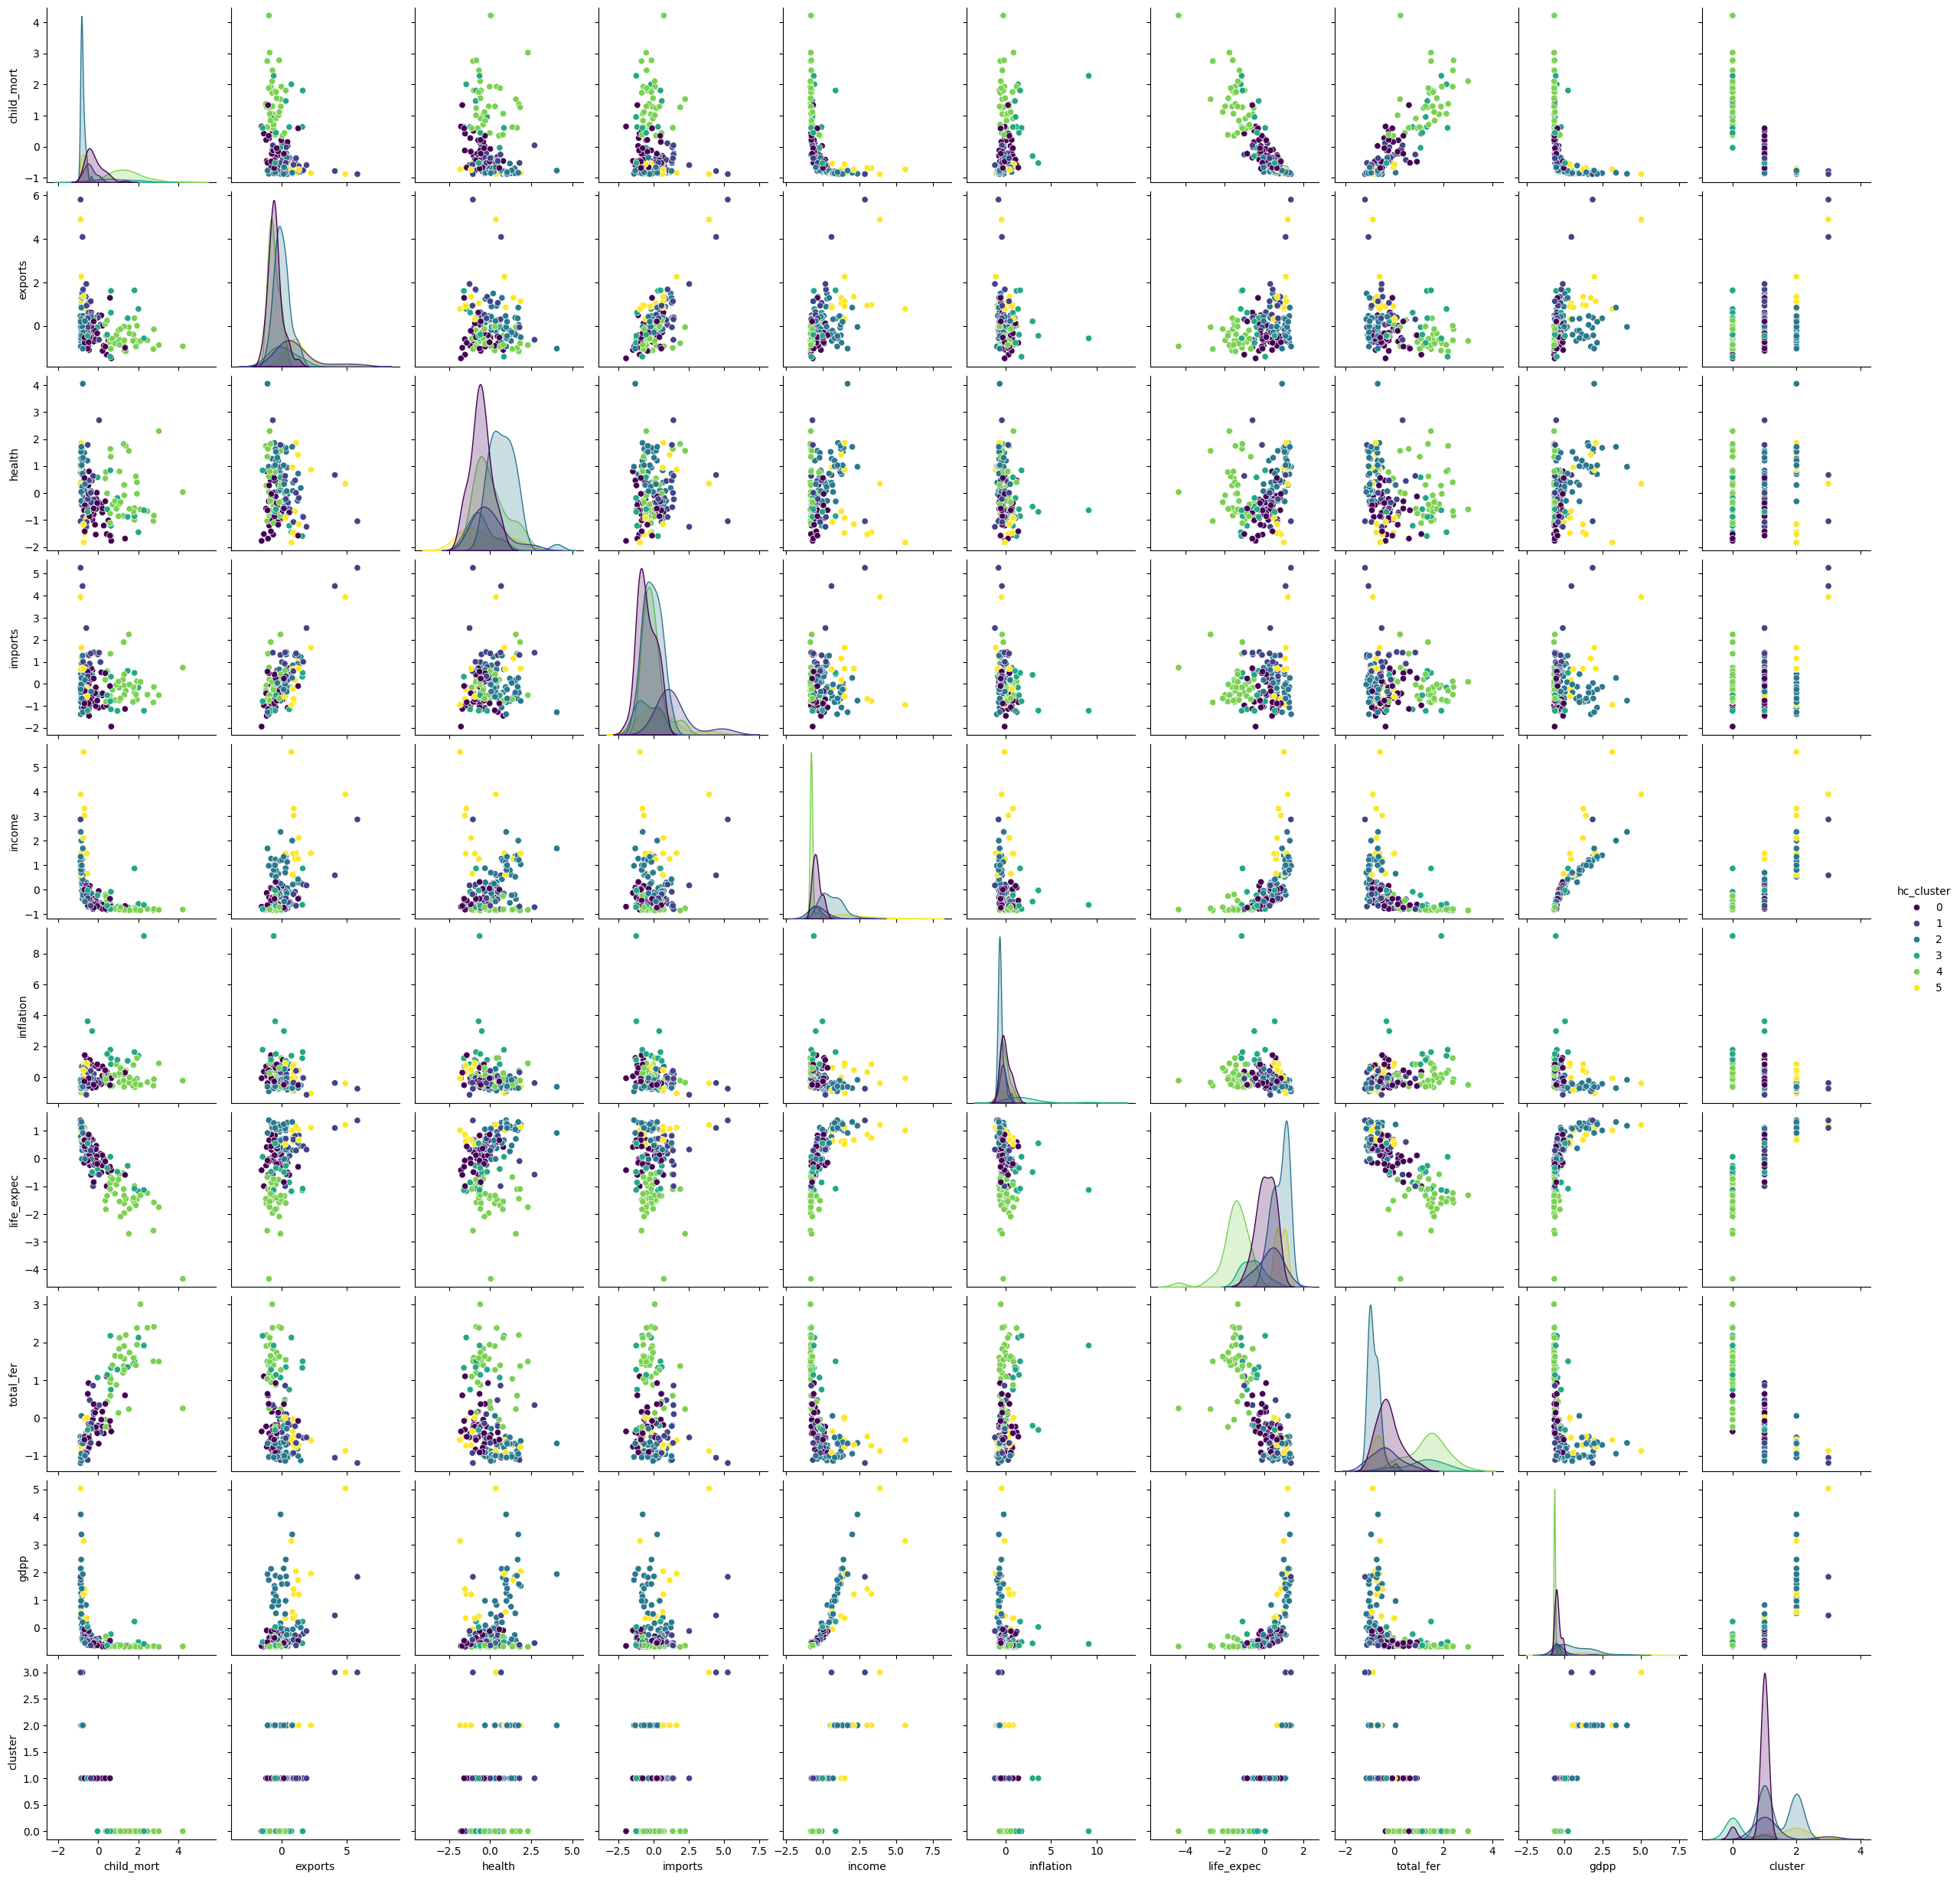

In [128]:
sns.pairplot(df_scale,hue='hc_cluster',palette='viridis')